In [201]:
import numpy as np
from numpy import exp, log, sqrt
from numpy.linalg import norm
from numpy.random import random
import matplotlib.pyplot as plt

In [266]:
N = 4

img1 = np.array([[2,   1,  2,  3],
                 [4,   5,  6,  7],
                 [8,   9, 10, 11],
                 [12, 13, 14, 15]])

img2 = np.array([[3,   1,  2,  3],
                 [4,   5,  6,  7],
                 [8,   9, 10, 11],
                 [12, 13, 14, 15]])

In [267]:
C = np.zeros((N ** 2, N ** 2))

for i in range(N ** 2):
    for j in range(N ** 2):
        C[i, j] = norm(np.array([i // N, i % N]) - np.array([j // N, j % N]), 2)

p = img1.reshape((N ** 2, ))
p = p / sum(p)
q = img2.reshape((N ** 2, ))
q = q / sum(q)

In [268]:
def sinkhorn(n, C, p, q, gamma, eps1, eps):
    l = np.ones(n)
    m = np.ones(n)

    X_new = 1/n**2 * np.ones((n, n))
    t = 0
    tt = 0
    while True:
        tt += 1
        X = X_new
        while not (sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)) <= eps):
            
            for i in range(n):
                l[i] = gamma * log(1/p[i] * sum([exp(-(gamma + C[i, j] + m[j])/gamma) * X[i, j] for j in range(n)]))
            for j in range(n):
                m[j] = gamma * log(1/q[j] * sum([exp(-(gamma + C[i, j] + l[i])/gamma) * X[i, j] for i in range(n)]))
            for i in range(n):
                for j in range(n):
                    X[i,j] = X[i, j] * exp(- (gamma + C[i,j] + l[i] + m[j])/gamma)
            #X_new = X * np.array(exp( -(gamma + C + np.matrix(l).T + m)/gamma ))
            t += 1

        if norm(X_new - X, 2) <= eps1:
            break
    return X_new, t

In [286]:
def test_gamma(method, gamma):
    gamma_exp = []
    T_exp = []
    opt_point = 0

    while (len(T_exp) <= 2) or (T_exp[-1] - T_exp[-2]) / (gamma_exp[-2] - gamma_exp[-1]) <= 1e+3:
        gamma /= 1.5
        X, T = method(gamma)
        gamma_exp.append(gamma)
        T_exp.append(T)
        print(T)
        try:
            if (opt_point == 0) and (T_exp[-1] - T_exp[-2]) / (gamma_exp[-2] - gamma_exp[-1]) >= 1:
                opt_point = gamma
        except:
            pass
    
    return gamma_exp, T_exp, opt_point

In [287]:
eps1 = 1e-7
eps = 1e-3
gamma_exp, T_exp, opt_point = test_gamma(lambda gamma: sinkhorn(N ** 2, C, p, q, gamma, eps1, eps), gamma=100)

3
3
3
3
3
5
8
305
375
803
829
1166
1450


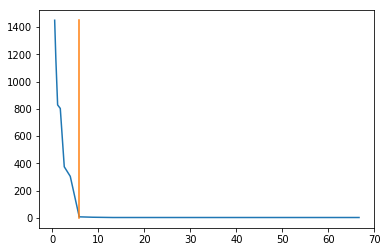

In [288]:
plt.plot(gamma_exp, T_exp)
plt.plot([opt_point, opt_point], [0, max(T_exp)], )

In [289]:
opt_point

5.8527663465935085